# Week 02
# Examples for lecture and lab

## Load Libraries

In [1]:
# for reading json files
import json

# numerical libraries
import numpy as np
import scipy as sp
import pystan

# pandas!
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [151]:
sns.set(style="white")

## Make a nice machine-readable dataset

### Absentee Ballot Data

In [ ]:
absentee_df = pd.read_csv('absentee.csv')

In [ ]:
absentee_df.columns

In [ ]:
# pandas added a column for the index in the CSV
absentee_df.drop('Unnamed: 0', axis=1, inplace=True)

# fix the year column
absentee_df['year'] = absentee_df['year'] + 1900

# make a key that uniquely identifies each row
absentee_df['yrdt'] = [int(str(absentee_df.iloc[i,0]).replace('\n','')+'0'+str(absentee_df.iloc[i,1])) for i in range(len(absentee_df))]

# and make it the index
absentee_df.set_index('yrdt',inplace=True)

# and output the dataframe to a dictionary
absentee_data_dict = absentee_df.to_dict()

In [ ]:
# define the metadata for the dataset
absentee_dict = {'info':'In November 1993, the state of Pennsylvania conducted elections for its state legislature. The result in the Senate election in the 2nd district (based in Philadelphia) was challenged in court, and ultimately overturned. The Democratic candidate won 19,127 of the votes cast by voting machine, while the Republican won 19,691 votes cast by voting machine, giving the Republican a lead of 564 votes. However, the Democrat won 1,396 absentee ballots, while the Republican won just 371 absentee ballots, more than offsetting the Republican lead based on the votes recorded by machines on election day. The Republican candidate sued, claiming that many of the absentee ballots were fraudulent. The judge in the case solicited expert analysis from Orley Ashenfelter, an economist at Princeton University. Ashenfelter examined the relationship between absentee vote margins and machine vote margins in 21 previous Pennsylvania Senate elections in seven districts in the Philadelphia area over the preceding decade.',
                 'source':'Ashenfelter, Orley. 1994. Report on Expected Asbentee Ballots. Typescript. Department of Economics, Princeton University.',
                 'url':'https://CRAN.R-project.org/package=pscl',
                 'vars':{'year':'a numeric vector, year of election, 19xx',
                         'district':'a numeric vector, Pennsylvania State Senate district',
                         'absdem':'a numeric vector, absentee ballots cast for the Democratic candidate',
                         'absrep':'a numeric vector, absentee ballots cast for the Republican candidate',
                         'machdem':'a numeric vector, votes cast on voting machines for the Democratic candidate',
                         'machrep':'a numeric vector, votes cast on voting machines for the Republican candidate',
                         'dabs':'a numeric vector, Democratic margin among absentee ballots',
                         'dmach':'a numeric vector, Democratic margin among ballots case on voting machines'
                         }
                }

In [ ]:
# store data with metadata
absentee_dict['data'] = absentee_data_dict

# do we have all the info in the dictionary?
absentee_dict.keys()

In [ ]:
# write metadata to a dictionary
with open('absentee_data.json', 'w') as fp:
    json.dump(absentee_dict, fp)

# close the file
fp.close()

### Math score data

In [ ]:
math_data = pd.read_csv('data/math_data.csv')

In [ ]:
# rename column
math_data.rename(columns={'Unnamed: 0':'student_id'},inplace=True)

# and make it the index
math_data.set_index('student_id',inplace=True)

# and output the dataframe to a dictionary
math_data_dict = math_data.to_dict()

In [ ]:
math_dict = {'info':'The data file used for this presentation is from the 1982 High School and Beyond Survey and is used extensively in Hierarchical Linear Models by Raudenbush and Bryk. It consists of 7,185 students nested in 160 schools. ',
             'source':'High School & Beyond (HS&B) is a nationally representative, longitudinal study of 10th and 12th graders in 1980. Follow-up surveys conducted throughout their postsecondary years. Surveys of students, teachers, and parents of sampled students. https://nces.ed.gov/surveys/hsb/',
             'url':' https://CRAN.R-project.org/package=merTools',
             'vars':{'schid':'a numeric vector, 160 unique values',
                     'mathach':'a numeric vector for the performance on a standardized math assessment',
                     'female':'a numeric vector coded 0 for male and 1 for female',
                     'ses':'a numeric measure of student socio-economic status',
                     'minority':'a numeric vector coded 0 for white and 1 for non-white students',
                     'schtype':'a numeric vector coded 0 for public and 1 for private schools',
                     'meanses':'a numeric, the average SES for each school in the data set',
                     'size':'a numeric for the number of students in the school'
                    }
            }

In [ ]:
# store data with metadata
math_dict['data'] = math_data_dict

# do we have all the info in the dictionary?
math_dict.keys()

In [ ]:
# write metadata to a dictionary
with open('data/math_data.json', 'w') as fp:
    json.dump(math_dict, fp)

# close the file
fp.close()

## Rock the Vote

In [436]:
rtv_data = pd.read_csv('data/rock_the_vote_data.csv')

In [437]:
# rename column
rtv_data.rename(columns={'Unnamed: 0':'cable_system_id'},inplace=True)

# and make it the index
rtv_data.set_index('cable_system_id',inplace=True)

# and output the dataframe to a dictionary
rtv_data_dict = rtv_data.to_dict()

In [438]:
rtv_dict = {'info':'Voter turnout data spanning 85 cable TV systems, randomly allocated to a voter mobilization experiment targetting 18-19 year olds with "Rock the Vote" television advertisments. Green and Vavreck (2008) implemented a cluster-randomized experimental design in assessing the effects of a voter mobilization treatment in the 2004 U.S. Presidential election. The clusters in this design are geographic areas served by a single cable television system. So as to facilitate analysis, the researchers restricted their attention to small cable systems whose reach is limited to a single zip code. Further, since the experiment was fielded during the last week of the presidential election, the researchers restricted their search to cable systems that were not in the 16 hotly-contested “battleground” states (as designated by the Los Angeles Times).',
            'source':'Green, Donald P. and Lynn Vavreck. 2008. Analysis of Cluster-Randomized Experiments: A Comparison of Alternative Estimation Approaches. Political Analysis 16:138-152.',
            'url':' https://CRAN.R-project.org/package=pscl',
            'vars':{'strata':'numeric, experimental strata',
                    'treated':'numeric, 1 if a treated cable system, 0 otherwise',
                    'r':'numeric, number of 18 and 19 year olds turning out',
                    'n':'numeric, number of 19 and 19 year olds registered',
                    'p':'numeric, proportion of 18 and 19 year olds turning out',
                    'treatedIndex':'numeric, a counter indexing the 42 treated units'
                   }
           }

In [439]:
# store data with metadata
rtv_dict['data'] = rtv_data_dict

# do we have all the info in the dictionary?
rtv_dict.keys()

dict_keys(['info', 'source', 'url', 'vars', 'data'])

In [441]:
# write metadata to a dictionary
with open('data/rock_the_vote_data.json', 'w') as fp:
    json.dump(rtv_dict, fp)

# close the file
fp.close()

## English Premier League

In [ ]:
epl_data = pd.read_csv('epl_scores_data.csv')

In [ ]:
# rename column
epl_data.rename(columns={'Unnamed: 0':'id'},inplace=True)

# and make it the index
epl_data.set_index('id',inplace=True)

# rename columns 
rename_dict = {}
cols = list(epl_data.columns)

for c in cols:
    rename_dict[c] = c.replace('epl_data.','')
    
epl_data.rename(columns=rename_dict,inplace=True)

# and output the dataframe to a dictionary
epl_data_dict = epl_data.to_dict()

In [ ]:
epl_data.head()

In [ ]:
epl_dict = {'info':'This is data from the 2015/2016 season of the English Premier League, which consists of 20 teams. Each two teams play two games with each other (home and away games). There are 38 weeks and 380 games in each season. We model the score difference (home team goals − away team goals) in each match.',
            'source':'https://github.com/stan-dev/stancon_talks/tree/master/2017/Contributed-Talks/02_kharratzadeh',
            'url':'footbal-data.co.uk',
            'vars':{'home_team':'numeric index of the home team',
                    'away_team':'numeric index of the away team',
                    'home_goals':'goals scored by home team',
                    'away_goals':'goals scored by away team',
                    'score_diff':'home_goals minus away_goals',
                    'home_week':'index of the week of the home team',
                    'away_week':'index of the week of the away team'
                   }
           }

In [ ]:
epl_teams = pd.read_csv('epl_team_data.csv')

In [ ]:
# rename column
epl_teams.rename(columns={'Unnamed: 0':'id'},inplace=True)

# and make it the index
epl_teams.set_index('id',inplace=True)

# rename columns 
rename_dict = {}
cols = list(epl_teams.columns)

for c in cols:
    rename_dict[c] = c.replace('epl_data.','')
    
epl_teams.rename(columns=rename_dict,inplace=True)

# and output the dataframe to a dictionary
epl_teams_dict = epl_teams.to_dict()

In [ ]:
epl_teams.head()

In [ ]:
# store data with metadata
epl_dict['data'] = epl_data_dict
epl_dict['teams'] = epl_teams_dict

# do we have all the info in the dictionary?
epl_dict.keys()

In [ ]:
# write metadata to a dictionary
with open('epl_data.json', 'w') as fp:
    json.dump(epl_dict, fp)

# close the file
fp.close()

## A function to print a long string nicely

In [2]:
def print_info(info,wpl=12):
    """
    nicely print a long paragraph
    """
    
    long_info = info.split()
    num_lines = round(len(long_info) / wpl)
    
    info_break = []
    
    # break up the long string into multiple lines
    for i in range(num_lines):
        hld = ''
        chunk = long_info[wpl*i:wpl*(i+1)]
        
        # piece each line into one string
        for i in range(len(chunk)):
            hld = hld + chunk[i] + ' '
        
        info_break.append(hld)
    
    # now print!
    for i in range(len(info_break)):
        print(info_break[i])

In [3]:
def print_vars(var_dict):
    """
    nicely print the infomation about each variable
    """
    # what's the longest variable name?
    max_len = 0
    for k in var_dict.keys():
        if len(k) > max_len:
            max_len = len(k)
    
    for k in var_dict.keys():
        len_k = len(k)
        print(str(k) + ' '*(max_len - len_k + 1) + ' :::  ' + var_dict[k])

## Class Example 1: Absentee Ballots

Background information about this example is in [this New York Times article](https://www.nytimes.com/1994/04/11/us/probability-experts-may-decide-pennsylvania-vote.html). Jackman presents this example in his _Bayesian Analysis for the Social Sciences_ in Example 2.13 on pages 87-92 and Example 2.14 on pages 95-98. The exercise provides an opportunity to talk about how to construct a random variable, priors, and likelihood. In addition, this is a real world example where a judge had to make a decision about an election outcome, so further underscores our point that we need insights from noisy data to inform our choices.

### Read in data

In [4]:
# read json file into a dictionary
with open('data/absentee_data.json', 'r') as f:
    json_data = json.load(f)

# close the file
f.close()

In [5]:
# what's the source?
print(json_data['source'])

Ashenfelter, Orley. 1994. Report on Expected Asbentee Ballots. Typescript. Department of Economics, Princeton University.


In [6]:
# where can i get these data?
print(json_data['url'])

https://CRAN.R-project.org/package=pscl


In [7]:
# print some info about the dataset
print_info(json_data['info'])

In November 1993, the state of Pennsylvania conducted elections for its state 
legislature. The result in the Senate election in the 2nd district (based 
in Philadelphia) was challenged in court, and ultimately overturned. The Democratic candidate 
won 19,127 of the votes cast by voting machine, while the Republican 
won 19,691 votes cast by voting machine, giving the Republican a lead 
of 564 votes. However, the Democrat won 1,396 absentee ballots, while the 
Republican won just 371 absentee ballots, more than offsetting the Republican lead 
based on the votes recorded by machines on election day. The Republican 
candidate sued, claiming that many of the absentee ballots were fraudulent. The 
judge in the case solicited expert analysis from Orley Ashenfelter, an economist 
at Princeton University. Ashenfelter examined the relationship between absentee vote margins and 
machine vote margins in 21 previous Pennsylvania Senate elections in seven districts 
in the Philadelphia area over t

In [8]:
# what variables are in the dataset?
print_vars(json_data['vars'])

year      :::  a numeric vector, year of election, 19xx
district  :::  a numeric vector, Pennsylvania State Senate district
absdem    :::  a numeric vector, absentee ballots cast for the Democratic candidate
absrep    :::  a numeric vector, absentee ballots cast for the Republican candidate
machdem   :::  a numeric vector, votes cast on voting machines for the Democratic candidate
machrep   :::  a numeric vector, votes cast on voting machines for the Republican candidate
dabs      :::  a numeric vector, Democratic margin among absentee ballots
dmach     :::  a numeric vector, Democratic margin among ballots case on voting machines


In [9]:
# just give it to me in a dataframe
data = pd.DataFrame(json_data['data'])
data

,year,district,absdem,absrep,machdem,machrep,dabs,dmach
198202,1982,2,551,205,47767,21340,346,26427
198204,1982,4,594,312,44437,28533,282,15904
198208,1982,8,338,115,55662,13214,223,42448
198401,1984,1,1357,764,58327,38883,593,19444
198403,1984,3,716,144,78270,6473,572,71797
198405,1984,5,1207,1436,54812,55829,-229,-1017
198407,1984,7,929,258,77136,13730,671,63406
198602,1986,2,609,316,39034,23363,293,15671
198604,1986,4,666,306,52817,16541,360,36276
198608,1986,8,477,171,48315,11605,306,36710


### What is our question?

> In November 1993 Pennsylvania conducted elections for its state legislature. The result in the Senate election in the 2nd district (based in Philadelphia) was challenged in court, and ultimately overturned. The Democratic candidate won 19, 127 of the votes cast by voting machine, while the Republican won 19,691 votes cast by voting machine, giving the Republican a lead of 564 votes. However, the Democrat won 1,396 absentee ballots, while the Republican won just 371, more than offsetting the Republican lead based on the votes recorded by machines on election day.
> The Republican candidate sued, claiming that many of the absentee ballots were fraudulent. The judge solicited expert analysis from Orley Ashenfelter, an economist at Princeton University, who examined the relationship between absentee vote margins and machine vote margins in 21 previous Pennsylvania Senate elections in seven districts in the Philadelphia area over the preceding decade.

Suppose instead that we are providing expert analysis. Should we advise the judge to throw out the election outcome, which would initiate a costly redo of the election and precipitate criminal charges against the Democratic candidate?

In [10]:
# here is the row of data in question
data.loc[['199302']]

,year,district,absdem,absrep,machdem,machrep,dabs,dmach
199302,1993,2,1396,371,19127,19691,1025,-564


### What is our random variable of interest?

Let $i = 1, \ldots, 21$ index the previous decade of elections.

To get us thinking:
* We want to know how unusual it is for the Democratic candidate to win 79 percent of the absentee ballots.
* Unusual with respect to what? Past machine shares? Past absentee shares?
* Was it a really good year for Democrats?

#### What's usual for machine ballots?

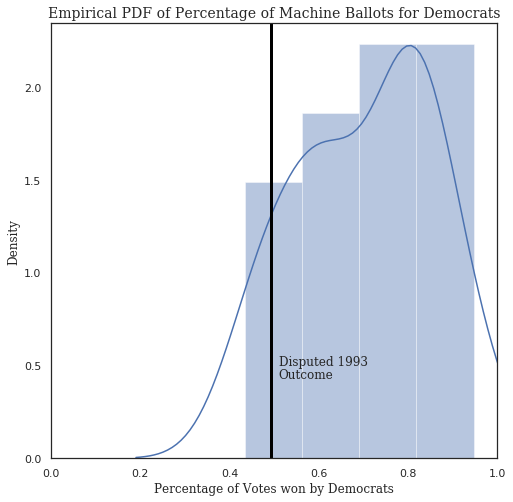

In [154]:
plt.figure(figsize=(8,8))
sns.distplot(data['machdem'][:-1]/(data['machdem'][:-1]+data['machrep'][:-1]))
plt.axvline(0.4927353289710959,lw=3,color='black')
plt.text(0.51,0.50,'Disputed 1993',family='serif',size=12)
plt.text(0.51,0.43,'Outcome',family='serif',size=12)
plt.title('Empirical PDF of Percentage of Machine Ballots for Democrats',family='serif',size=14)
plt.xlim(0,1)
plt.xlabel('Percentage of Votes won by Democrats',family='serif',size=12)
plt.ylabel('Density',family='serif',size=12);

#### What's usual for absentee ballots?

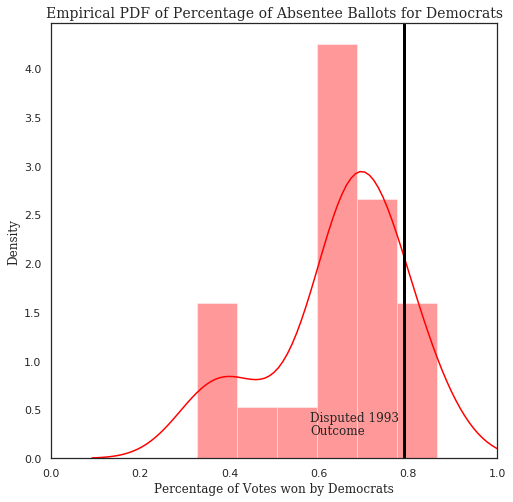

In [153]:
plt.figure(figsize=(8,8))
sns.distplot(data['absdem'][:-1]/(data['absdem'][:-1]+data['absrep'][:-1]),color='red')
plt.axvline(0.7900396151669496,lw=3,color='black')
plt.text(0.58,0.38,'Disputed 1993',family='serif',size=12)
plt.text(0.58,0.25,'Outcome',family='serif',size=12)
plt.title('Empirical PDF of Percentage of Absentee Ballots for Democrats',family='serif',size=14)
plt.xlim(0,1)
plt.xlabel('Percentage of Votes won by Democrats',family='serif',size=12)
plt.ylabel('Density',family='serif',size=12);

#### How have percentages won by Democrats varied over time?

In [107]:
# compute the percent won by Democrats over all elections
data['prcnt_dem_abs'] = 100*(data['absdem']/(data['absdem']+data['absrep']))
data['prcnt_dem_mch'] = 100*(data['machdem']/(data['machdem']+data['machrep']))

# compute percentiles
lft = data.groupby('year').quantile(0.25)[['prcnt_dem_abs','prcnt_dem_mch']].rename(columns={'prcnt_dem_abs':'abs_low','prcnt_dem_mch':'mch_low'})
mid = data.groupby('year').quantile(0.50)[['prcnt_dem_abs','prcnt_dem_mch']].rename(columns={'prcnt_dem_abs':'abs_mid','prcnt_dem_mch':'mch_mid'})
rght = data.groupby('year').quantile(0.75)[['prcnt_dem_abs','prcnt_dem_mch']].rename(columns={'prcnt_dem_abs':'abs_hgh','prcnt_dem_mch':'mch_hgh'})

# and merge together
m1 = pd.merge(left=lft,right=mid,left_on='year',right_on='year')
m2 = pd.merge(left=m1,right=rght,left_on='year',right_on='year')

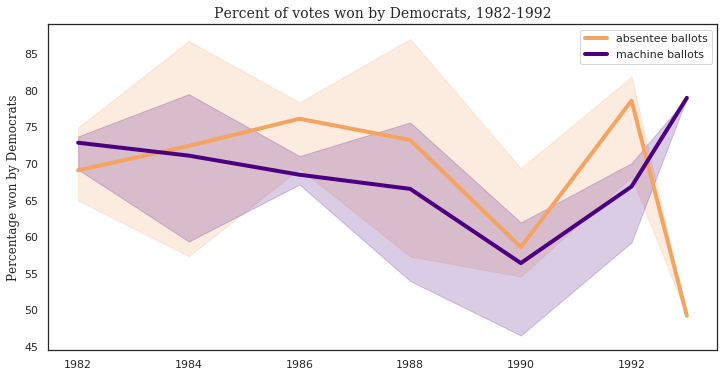

In [152]:
plt.figure(figsize=(12,6))

# ranges
plt.fill_between(m2.index,m2.mch_low,m2.mch_hgh,alpha=0.2,color='sandybrown')
plt.fill_between(m2.index,m2.abs_low,m2.abs_hgh,alpha=0.2,color='indigo')

# middle of ranges
plt.plot(m2.mch_mid,color='sandybrown',lw=4,label='absentee ballots')
plt.plot(m2.abs_mid,color='indigo',lw=4,label='machine ballots')

# labels
plt.title('Percent of votes won by Democrats, 1982-1992',family='serif',size=14)
plt.ylabel('Percentage won by Democrats',family='serif',size=12)
plt.legend();

#### So the previous graph shows something interesting, let's look at a scatter plot.

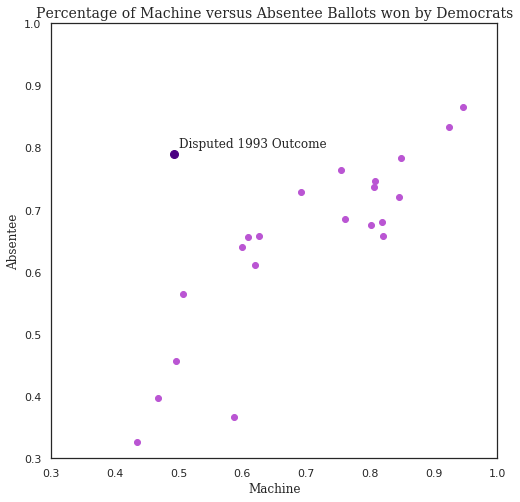

In [155]:
# now let's plot all the relationships between machine and absentee votes
plt.figure(figsize=(8,8))
plt.scatter(data['machdem']/(data['machdem']+data['machrep']),data['absdem']/(data['absdem']+data['absrep']),color='mediumorchid')
plt.text(0.50,0.80,'Disputed 1993 Outcome',family='serif',size=12)
plt.plot(0.4927353289710959,0.7900396151669496, marker='o', markersize=8, color="indigo")
plt.title('Percentage of Machine versus Absentee Ballots won by Democrats',family='serif',size=14)
plt.xlim(0.3,1)
plt.ylim(0.3,1)
plt.xlabel('Machine',family='serif',size=12)
plt.ylabel('Absentee',family='serif',size=12);

#### Now, let's translate this to a random variable

Let our random variable be $y_i = a_i - m_i$. Where $a_i$ is the Democratic percentage of the two-party vote cast via absentee ballot; $m_i$ is the Democratic percentage of the two-party vote cast via machine ballot; and $y_i$ is the difference between the two.

### Model for $y_i$

To a Bayesian a model is a likelihood and a prior.

#### Likilihood
We will use a normal likelihood for this random variable:
$y_i \sim \textrm{Normal}(\mu,\sigma)$

Why a normal likelihood? The variable is continuous and varies from $(-100,100)$, so the Normal is a not wrong first choice for epistemological and ontological reasons as dicsussed previously.

#### Priors
We need to put priors on the two parameters of the Normal distribution:
* the mean, $\mu$, and 
* variance, $\sigma^2$. 

What should we use for the prior of $\mu$?
* How would we expect the mean difference between absentee versus machine percentages to be? 
* It has to be between $(-100,100)$.
* Do we expect there to be differences in the use of absentee ballots by Democrats and Republicans?
* Are Democratic-leaning districts better at turning out absentee voters?

How much do we think the difference varies over elections? ie, the variance.
* How often will the mean be between plus or minus $\tau$?


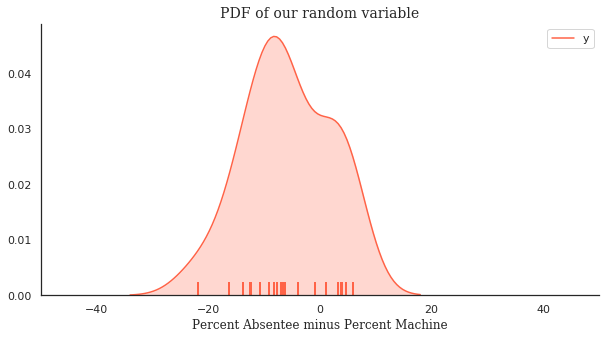

In [361]:
# compute our random variable
data['y'] = data['prcnt_dem_abs'] - data['prcnt_dem_mch'] 

# setup figure
plt.figure(figsize=(10,5))

# draw plot
sns.kdeplot(data.y[:-1],shade=True,color='tomato')
sns.rugplot(data.y[:-1], color='tomato', linewidth=2);
sns.despine()
plt.title('PDF of our random variable',family='serif',size=14)
plt.xlabel('Percent Absentee minus Percent Machine',family='serif',size=12)
plt.xlim(-50,50);

### Building our model for $y$

#### Setting the prior for $\mu$

In [145]:
# compute the pdf of our prior for mu
x_mu = np.linspace(-100,100,400)
y_mu = sp.stats.norm.pdf(x_mu, loc=0, scale=20)

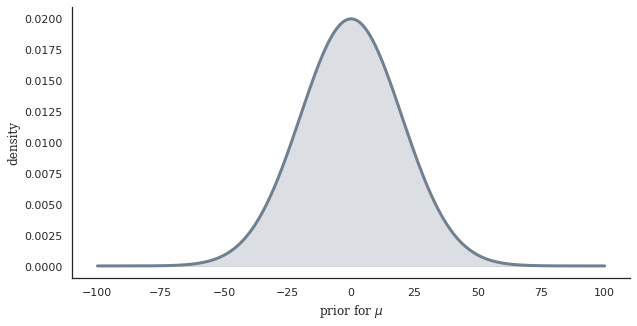

In [157]:
# plot the prior for **mu**

# setup figure
plt.figure(figsize=(10,5))

# make the figure
plt.plot(x_mu,y_mu,lw=3,color='slategray')
plt.fill_between(x_mu,y_mu,alpha=0.25,color='slategray')
sns.despine()

# label the figure
plt.xlabel('prior for $\mu$',family='serif',size=12)
plt.ylabel('density',family='serif',size=12);

#### Setting the prior for $\sigma$

For the variance we need a distribution that generates values greater than 0. What is some intuition for formulating prior information on the degree to which a quantity varies? One way to do this is ask yourself within what range of plus or minus $\tau$ will 50 percent of the values lie? Picking $\tau$ is equivalent to specifying the 75th percentile of the dependent variable.

Below is a function that will give you the variance of a normal distribution such that 75 percent of the mass is below $\tau$.

In [192]:
def sigma_given_tau(tau):
    """
    give this function what you think tau is,
    and it will tell you what the variance
    should be so that 75 percent of the 
    values are less than tau
    """
    return tau / sp.stats.norm.ppf(0.75)

In [193]:
# suppose tau is +/-3
sigma_given_tau(3)

4.447806655516806

In [195]:
# suppose tau is +/-10
sigma_given_tau(10)

14.82602218505602

To get a handle of what the distributoin of $y$ looks like under these assumptions, we can plot the PDF.

In [271]:
# first, compute the pdf of our random variable given our selection of tau
x_rv = np.linspace(-100,100,400)
y_rv_one = sp.stats.norm.pdf(x_rv, loc=0, scale=4.447806)
y_rv_two = sp.stats.norm.pdf(x_rv, loc=0, scale=14.82602)

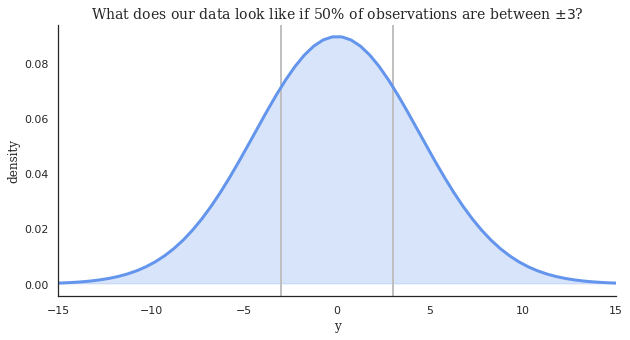

In [399]:
# setup figure
plt.figure(figsize=(10,5))

# make the figure
plt.axvline(-3,lw=2,color='silver')
plt.axvline(3,lw=2,color='silver')
plt.plot(x_rv,y_rv_one,lw=3,color='cornflowerblue',label='tau = 3')
plt.fill_between(x_rv,y_rv_one,alpha=0.25,color='cornflowerblue')
plt.xlim(-15,15)
sns.despine()

# label the figure
plt.title('What does our data look like if 50% of observations are between $\pm 3$?',family='serif',size=14)
plt.xlabel('y',family='serif',size=12)
plt.ylabel('density',family='serif',size=12);

Now let's put our 2 tau's side by side to see what they look like.

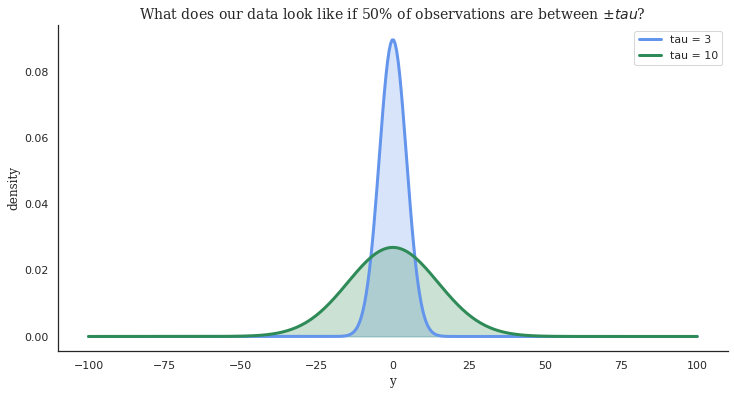

In [274]:
# setup figure
plt.figure(figsize=(12,6))

# make the figure
plt.plot(x_rv,y_rv_one,lw=3,color='cornflowerblue',label='tau = 3')
plt.fill_between(x_rv,y_rv_one,alpha=0.25,color='cornflowerblue')

plt.plot(x_rv,y_rv_two,lw=3,color='seagreen',label='tau = 10')
plt.fill_between(x_rv,y_rv_two,alpha=0.25,color='seagreen')

sns.despine()

# label the figure
plt.title('What does our data look like if 50% of observations are between $\pm tau$?',family='serif',size=14)
plt.xlabel('y',family='serif',size=12)
plt.ylabel('density',family='serif',size=12)
plt.legend();

Now we can translate our two chosen $\tau$'s into a gamma distribution. The gamma distribution has non-negative support, and we can pick the parameters such that the mean is between 3 and 10. Those parameters in the ``scipy.stats`` version of the gamma distribution and the corresponding PDF are below.

In [284]:
# compute the pdf of our prior for sigma
x_sig = np.linspace(0,30,300)
y_sig = sp.stats.gamma.pdf(x_sig, a=3.25, loc=0, scale=2)

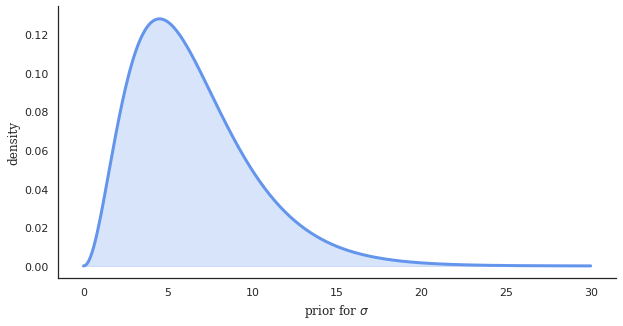

In [285]:
# plot the prior for **sigma**

# setup figure
plt.figure(figsize=(10,5))

# make the figure
plt.plot(x_sig,y_sig,lw=3,color='cornflowerblue')
plt.fill_between(x_sig,y_sig,alpha=0.25,color='cornflowerblue')
sns.despine()

# label the figure
plt.xlabel('prior for $\sigma$',family='serif',size=12)
plt.ylabel('density',family='serif',size=12);

This gamma prior gives us values greater than zero, has a mean of 6 and concentrates most of the weight between 3 and 10. However, it still allows our model to find high variance values if needed---it does not rule them out (Cromwell).

>[Cromwell's rule](https://en.wikipedia.org/wiki/Cromwell's_rule), named by statistician Dennis Lindley, states that the use of prior probabilities of 1 ("the event will definitely occur") or 0 ("the event will definitely not occur") should be avoided, except when applied to statements that are logically true or false, such as 2+2 equaling 4 or 5.

>The reference is to Oliver Cromwell, who wrote to the General Assembly of the Church of Scotland on 5 August 1650, including a phrase that has become well known and frequently quoted:

>I beseech you, in the bowels of Christ, think it possible that you may be mistaken.

>If the prior probability assigned to a hypothesis is 0 or 1, then, by Bayes' theorem, the posterior probability (probability of the hypothesis, given the evidence) is forced to be 0 or 1 as well; no evidence, no matter how strong, could have any influence.

#### The Bayesian Two-Step: simulating data from our priors

We can now do the Bayesian Two-Step by simulating values from our priors, then sampling from our likelihood to generate data. This shows us how our priors interact with the likelihood. These interactions can be complex, but the Two-Step can handle it. 

Questions to think about as you look at these plots:
1. Does our model generate plausible data? 
2. Does our model completely fail by only generating outrageous data?
3. Does our model allow for extreme states of the world?

#### Implement Bayes' Two-Step in Python

In [286]:
# setup simulation
n_sim = 500
prior_data = np.zeros(shape=(n_sim,2))
pr_pred_draws = {}
col_names = ['prior_mu','prior_sigma']
n_pr_data = len(data) - 1 # number of observed data points excluding the last one

# generate data
for i in range(n_sim):
    
    # Step One: 
    # simulate from prior distributions
    prior_data[i,0] = sp.stats.norm.rvs(loc=0, scale=20,size=1)[0] # simulate prior mean
    prior_data[i,1] = sp.stats.gamma.rvs(a=3.25, loc=0, scale=2,size=1)[0] # simulate prior variance
    
    # Step Two: 
    # for the generated prior values,
    # sample from our likelihood
    pr_pred_draws[i] = sp.stats.norm.rvs(loc=prior_data[i,0], scale=prior_data[i,1],size=n_pr_data)
   
y_prior = pd.DataFrame(prior_data,columns=col_names)

#### Implement Bayes' Two-Step in Stan

In [421]:
# what's in this stan model anyway?
f = open('absentee_prior.stan', 'r')
file_contents = f.read()
print (file_contents)
f.close()

// generate data from the priors of the normal model
// example 2.13 from Jackman
data {
  // *** NO DATA ***
}
parameters {
  real mu;              // prior mean
  real<lower=0> sigma;  // prior variance
}
model {
  // sample from priors
  mu ~ normal(0,20);
  sigma ~ gamma(3.25,0.5);
}
generated quantities {
  real y_sim;    // simulated values from the posterior

  y_sim = normal_rng(mu,sigma); // sample from normal distribution
}



In [401]:
# compile Stan model
pm = pystan.StanModel(file="absentee_prior.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_44a8bcf40f85c3e299401811bfd3f7e4 NOW.


In [403]:
# conduct MCMC using Stan
pr_draws = pm.sampling(iter=1000, chains=1)

In [404]:
# give us a dictionary containing posterior draws for each parameter in the model
pr_pd = pr_draws.extract(permuted=True)

In [405]:
pr_pd.keys()

odict_keys(['mu', 'sigma', 'y_sim', 'lp__'])

#### Compare Stan & Python priors

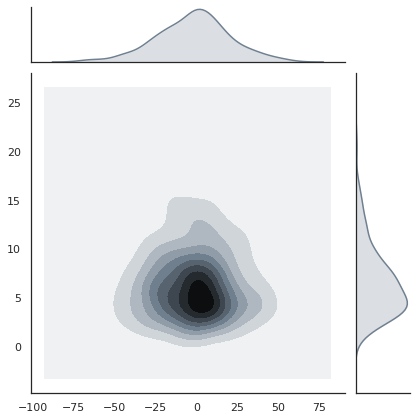

In [417]:
# plot the joint distribution of our priors generated by Stan
sns.jointplot(pr_pd['mu'], pr_pd['sigma'], kind='kde', color='slategray')
sns.despine();

Since we only have two parameters, we can plot the joint distribution of our priors.

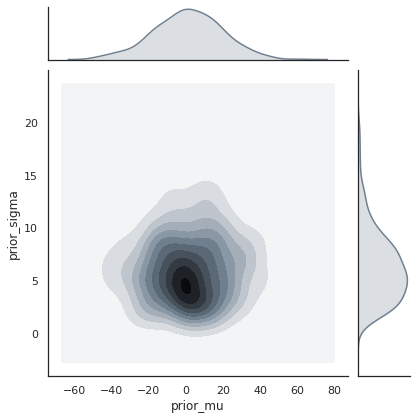

In [418]:
# plot the joint distribution of our priors generated by Python
sns.jointplot(y_prior.prior_mu, y_prior.prior_sigma, kind='kde', color='slategray')
sns.despine();

#### Prior predictive Distribution

Now we plot simulated data from our prior distributions against our observed data.

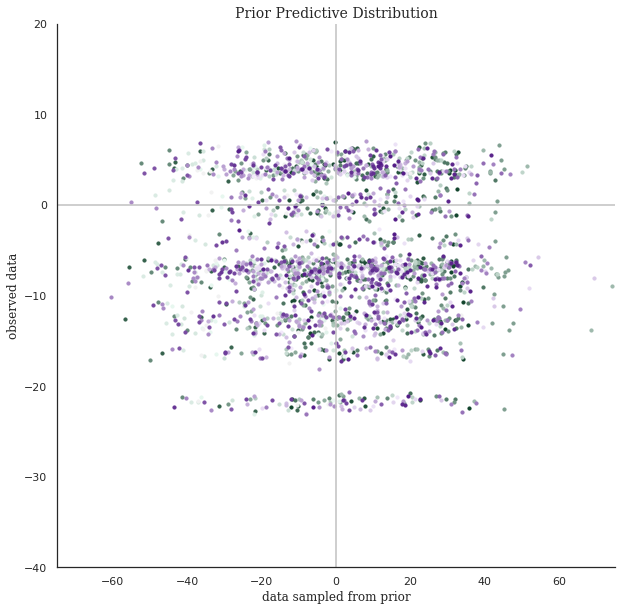

In [262]:
plt.figure(figsize=(10,10))

nscttr = 101
#colors = sns.diverging_palette(10, 220, sep=80, n=nscttr)
colors = sns.diverging_palette(145, 280, s=85, l=25, n=nscttr)

c = 0
for i in np.random.choice(range(n_sim),nscttr,replace=False):
    plt.scatter(pr_pred_draws[i],data.y[:-1]+sp.stats.norm.rvs(0,0.5,size=21),color=colors[c],s=10)
    c += 1

# make it pretty
plt.axvline(0,color='silver')
plt.axhline(0,color='silver')
plt.xlim(-75,75)
plt.ylim(-40,20)
sns.despine()

# label the figure
plt.title('Prior Predictive Distribution',family='serif',size=14)
plt.xlabel('data sampled from prior',family='serif',size=12)
plt.ylabel('observed data',family='serif',size=12);

The above graph shows us what kinds of datasets our model _can_ produce. We want it to be able to produce things that look like the data as well as extreme versions of it. Follow the clump of points at $y = -21$, these are all possibilites our model could generate.

#### Prior Flipbook

Now we look at a flip book of possible datasets from our prior, not against the data, but as a histogram.

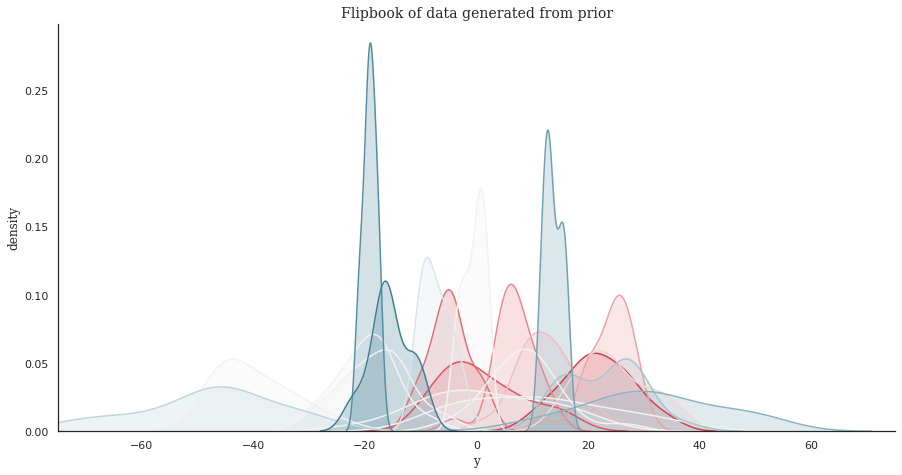

In [283]:
# setup figure
plt.figure(figsize=(15,7.5))

nflips = 21
colors = sns.diverging_palette(10, 220, sep=80, n=nflips)

# plot a few randomly selected datasets generated from our prior
c = 0
for i in np.random.choice(range(n_sim),nflips,replace=False):
    sns.kdeplot(pr_pred_draws[i],color=colors[c],shade=True)
    c += 1
    
# make it pretty
#plt.axvline(0,color='silver')
plt.xlim(-75,75)
sns.despine()

# label the figure
plt.title('Flipbook of data generated from prior',family='serif',size=14)
plt.xlabel('y',family='serif',size=12)
plt.ylabel('density',family='serif',size=12);

### Estimating our model

We will finally (!) estimate this model using MCMC and Stan. First we inspect our model, then we compile and conduct sampling. 

In [293]:
# what's in this stan model anyway?
f = open('absentee.stan', 'r')
file_contents = f.read()
print (file_contents)
f.close()

// normal model to fit on absentee vote dataset
// example 2.13 from Jackman
data {
  int<lower=1> N; // number of datapoints
  real y[N];      // random variable
}
parameters {
  real mu;              // prior mean
  real<lower=0> sigma;  // prior variance
}
model {
  // sample from priors
  mu ~ normal(0,20);
  sigma ~ gamma(3.25,0.5);

  // specify likelihood
  y ~ normal(mu,sigma);
}



In [328]:
# compile Stan model
sm = pystan.StanModel(file="absentee.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_dd45750db21b58c8edf0c4d8d229ad68 NOW.


In [295]:
# build dataset for Stan
stan_data = {'N':len(data)-1,'y':data.y[:-1]}

In [374]:
# conduct MCMC using Stan
fit = sm.sampling(data=stan_data, iter=4000, chains=4)

In [375]:
# print some pretty summary stats about the posterior
print(fit)

Inference for Stan model: anon_model_dd45750db21b58c8edf0c4d8d229ad68.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     -5.79    0.02    1.7  -9.14   -6.9   -5.8  -4.67  -2.39   5508    1.0
sigma   7.76    0.02    1.2   5.82    6.9   7.63   8.49  10.46   5195    1.0
y_sim  -5.83    0.09   7.94 -21.74 -11.04   -5.8  -0.65   9.94   7813    1.0
lp__   -50.9    0.02   1.03 -53.73 -51.28 -50.59 -50.17  -49.9   3207    1.0

Samples were drawn using NUTS at Tue Oct  8 12:53:11 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [376]:
# give us a dictionary containing posterior draws for each parameter in the model
ps = fit.extract(permuted=True)

In [377]:
ps.keys()

odict_keys(['mu', 'sigma', 'y_sim', 'lp__'])

#### Visualizing the posterior

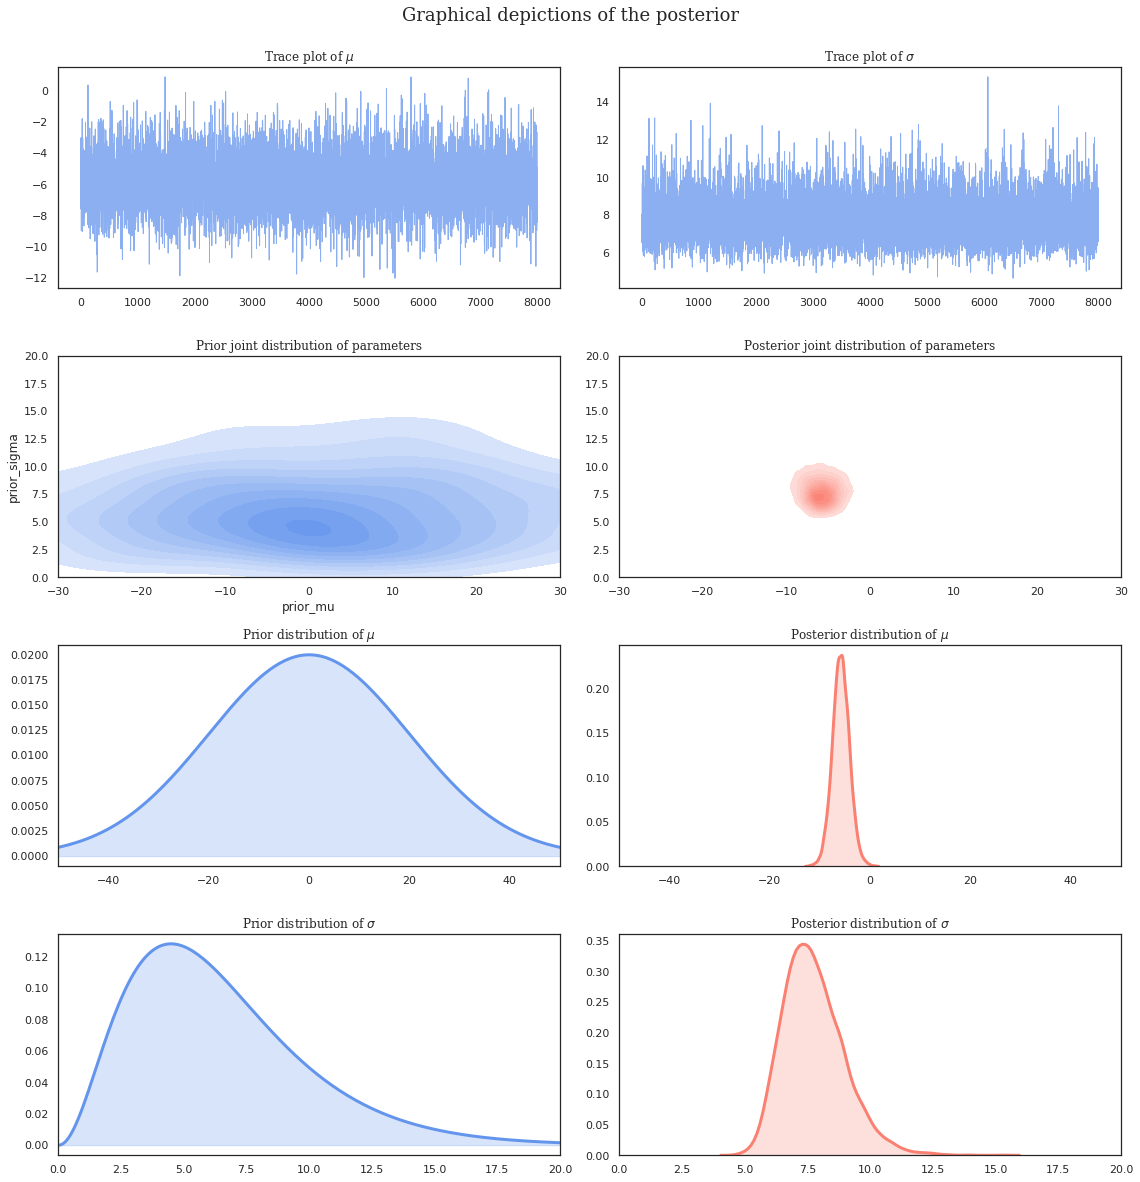

In [378]:
# Initialise the figure and a subplot axes.
num_rows = 4
num_cols = 2
fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# overall title
fig.suptitle('Graphical depictions of the posterior',y=1.025,fontsize=18,fontfamily='serif')

# ___ROW ONE___
# **trace plots**
ax[0,0].plot(ps['mu'],lw=1,alpha=0.75,color='cornflowerblue')
ax[0,0].set_title('Trace plot of $\mu$',fontsize=12,fontfamily='serif')
ax[0,1].plot(ps['sigma'],lw=1,alpha=0.75,color='cornflowerblue')
ax[0,1].set_title('Trace plot of $\sigma$',fontsize=12,fontfamily='serif')

# ___ROW TWO___
# **joint distribution** of parameters
sns.kdeplot(y_prior.prior_mu, y_prior.prior_sigma,
            color='cornflowerblue', shade=True, shade_lowest=False,ax=ax[1,0])
sns.kdeplot(ps['mu'], ps['sigma'],
            color="salmon", shade=True, shade_lowest=False,ax=ax[1,1])

ax[1,0].set_title('Prior joint distribution of parameters',fontsize=12,fontfamily='serif')
ax[1,0].set_xlim(-30,30)
ax[1,0].set_ylim(0,20)
ax[1,1].set_title('Posterior joint distribution of parameters',fontsize=12,fontfamily='serif')
ax[1,1].set_xlim(-30,30)
ax[1,1].set_ylim(0,20)

# ___ROW THREE___
# prior and posterior of **mu**
ax[2,0].plot(x_mu,y_mu,lw=3,color='cornflowerblue')
ax[2,0].fill_between(x_mu,y_mu,alpha=0.25,color='cornflowerblue')

sns.kdeplot(ps['mu'],shade=True, lw=3,color='salmon',shade_lowest=False,ax=ax[2,1])

ax[2,0].set_title('Prior distribution of $\mu$',fontsize=12,fontfamily='serif')
ax[2,0].set_xlim(-50,50)
ax[2,1].set_title('Posterior distribution of $\mu$',fontsize=12,fontfamily='serif')
ax[2,1].set_xlim(-50,50)

# ___ROW FOUR___
# prior and posterior of **sigma**
ax[3,0].plot(x_sig,y_sig,lw=3,color='cornflowerblue')
ax[3,0].fill_between(x_sig,y_sig,alpha=0.25,color='cornflowerblue')

sns.kdeplot(ps['sigma'],shade=True, lw=3,color='salmon',shade_lowest=False,ax=ax[3,1])

ax[3,0].set_title('Prior distribution of $\sigma$',fontsize=12,fontfamily='serif')
ax[3,0].set_xlim(0,20)
ax[3,1].set_title('Posterior distribution of $\sigma$',fontsize=12,fontfamily='serif')
ax[3,1].set_xlim(0,20)


# make the plot prettier
plt.tight_layout()
plt.show()

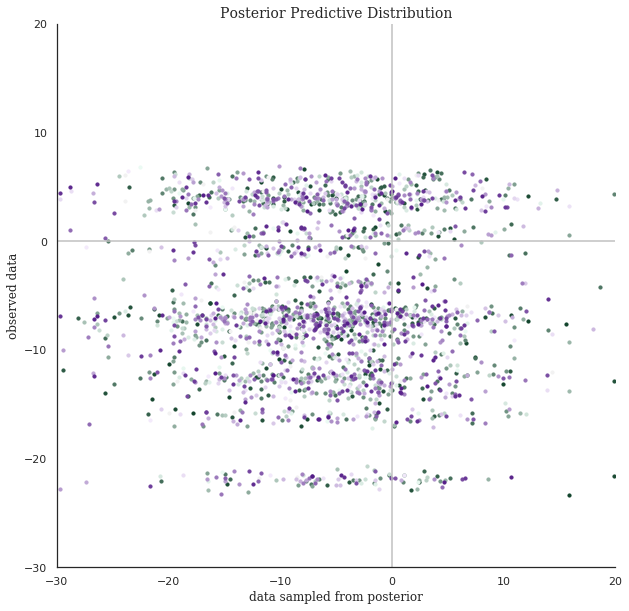

In [335]:
plt.figure(figsize=(10,10))

nscttr = 101
#colors = sns.diverging_palette(10, 220, sep=80, n=nscttr)
colors = sns.diverging_palette(145, 280, s=85, l=25, n=nscttr)

c = 0
for i in np.random.choice(range(n_sim),nscttr,replace=False):
    # randomly sample 21 values from the posterior
    y_post = np.random.choice(ps['y_sim'],len(data.y[:-1]),replace=False)
    
    # then plot against observations
    plt.scatter(y_post,data.y[:-1]+sp.stats.norm.rvs(0,0.5,size=21),color=colors[c],s=10)
    c += 1

# make it pretty
plt.axvline(0,color='silver')
plt.axhline(0,color='silver')
plt.xlim(-30,20)
plt.ylim(-30,20)
sns.despine()

# label the figure
plt.title('Posterior Predictive Distribution',family='serif',size=14)
plt.xlabel('data sampled from posterior',family='serif',size=12)
plt.ylabel('observed data',family='serif',size=12);

The above graphical check isn't that relevant here, because our model isn't designed to predict specific points. The main focus of the model is to uncover the distribution of the random variable of interest. To get at that, let's look at the empirical CDF of the data versus the posterior.

Here is a function to compute the empirical CDF of any data series.

In [336]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

In [380]:
# compute the empirical CDF of the data and posterior
x_data, y_data = ecdf(data.y[:-1])
x_post, y_post = ecdf(ps['y_sim'])

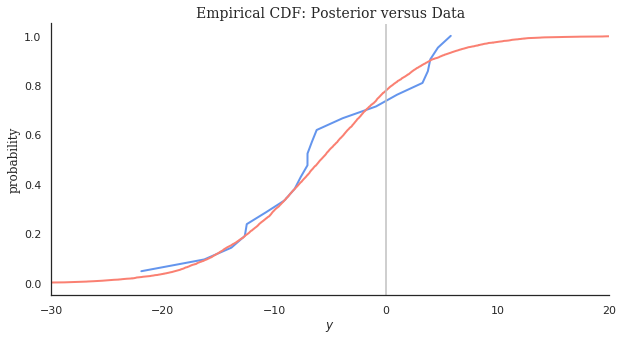

In [381]:
plt.figure(figsize=(10,5))

plt.plot(x_data,y_data,lw=2,color='cornflowerblue',label='data')
plt.plot(x_post,y_post,lw=2,color='salmon',label='posterior')

# make it pretty
plt.axvline(0,color='silver')
plt.xlim(-30,20)
sns.despine()

# label the figure
plt.title('Empirical CDF: Posterior versus Data',family='serif',size=14)
plt.xlabel('$y$',family='serif',size=12)
plt.ylabel('probability',family='serif',size=12);

A slightly more interesting way to do this, is to randomly sample 21 data points from the posterior without replacement and plot many CDFs to get a sense for how much variability is in our model.

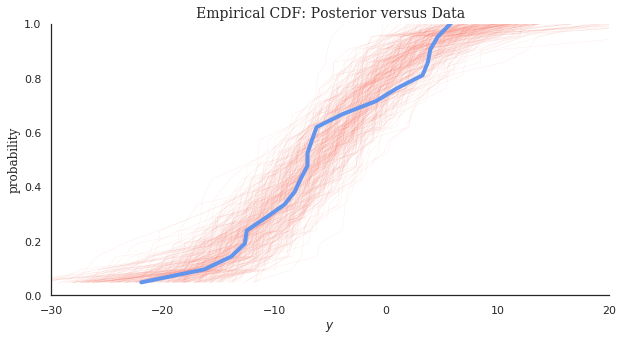

In [382]:
plt.figure(figsize=(10,5))

# plot a bunch of ECDFs from the posterior
for i in range(300):
    # randomly sample 21 values from the posterior
    y_post_samp = np.random.choice(ps['y_sim'],len(data.y[:-1]),replace=False)
    
    # compute ECDF
    x_post, y_post = ecdf(y_post_samp)
    
    # then plot 
    plt.plot(x_post,y_post,lw=0.25,alpha=0.25,color='salmon',label='posterior')

# plot the CDF of the data
plt.plot(x_data,y_data,lw=4,color='cornflowerblue',label='data')
    
# make it pretty
plt.xlim(-30,20)
plt.ylim(0,1)
sns.despine()

# label the figure
plt.title('Empirical CDF: Posterior versus Data',family='serif',size=14)
plt.xlabel('$y$',family='serif',size=12)
plt.ylabel('probability',family='serif',size=12);

The model does a decent job of capturing the variability of the observed posterior. There are notable departures between the posterior and data from $y = -5$ to $y = 4$, which corresponds to a region where we have few observations. 

### Now, let's answer the question

How unusual it is for the Democratic candidate to win 29 percent more absentee ballots than machine ballots? 

We can compute this from our posterior. What is the probability that we observe $y \geq 29.7$?

$P(y \geq 29.7 | \mathbf{y})$

In [383]:
# this isn't observed in our posterior, so Pr(y >= 29.7) = 0 !
y_post = pd.DataFrame(ps['y_sim'],columns=['y_sim'])
y_post[y_post.y_sim >= 29.7]

Since this is a rare event, we can compute the probability directly from our posterior samples using the CDF of the normal distribution.

In [390]:
prob_1993 = np.zeros(len(ps['y_sim']))

for i in range(len(ps['y_sim'])):
    prob_1993[i] = 1 - sp.stats.norm.cdf(29.7,loc=ps['mu'][i],scale=ps['sigma'][i])

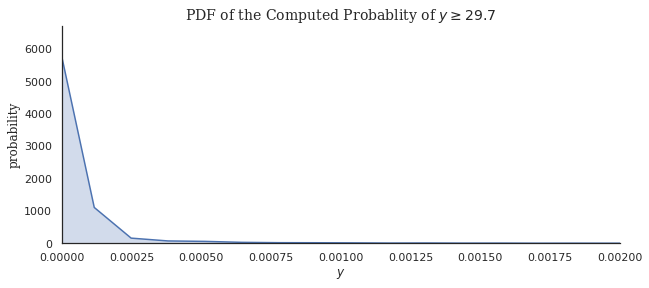

In [397]:
plt.figure(figsize=(10,4))
sns.kdeplot(prob_1993,shade=True)
sns.despine()

# label the figure
plt.title('PDF of the Computed Probablity of $y \geq 29.7$',family='serif',size=14)
plt.xlabel('$y$',family='serif',size=12)
plt.ylabel('probability',family='serif',size=12)
plt.xlim(0,0.002);

So what do we tell the judge about the plausibility of observing a 29.7 difference between the percentage of absentee ballots won by Democrats and the percentage of machine ballots won by the Democrats?

How would we write this up?

## Class Example 2: Rock the Vote

Jackman presents this example in his _Bayesian Analysis for the Social Sciences_ in Example 7.9 on pages 355-362. The exercise provides an opportunity to estimate a binomial dependent variable and sets us up to talk about this example later when we talk about multi-level models. Also, a great opportunity to dive into Bayesian modeling in the context of a field experiment.

>Prior to the presidential election in November 2004, we assembled a nationwide list of cable systems that covered only a single zip code. Small cable TV systems are a fertile source of experimental data for social scientists because their small size makes them inexpensive and conducive to large-N randomized studies. In order to test the televised messages in an environment that would not be dominated by other election-related advertisements, we removed all cable systems in 16 states that the Los Angeles Times classified as presidential battlegrounds (closely contested states). We then excluded any systems that had no time available in prime time during the week before the election or that cost more than 15 dollars per 30-second advertisement on the USA television network. We excluded all systems in Mississippi because its voter file is very difficult to obtain. This left 85 cable systems for randomization.

>Random assignment of the cable systems took place as follows. Each system was matched with one or two other systems in the same state according to its past turnout rate in presidential elections. This procedure resulted in 40 strata containing the 85 cable systems. After sorting the list of 85 cable systems by strata and then by a random number, the first cable system in each stratum was assigned to the treatment condition, the others to control.

>People living within the treatment systems saw two different 30-second advertisements produced by Rock the Vote. Both advertisements used the same format. The first dealt with the draft and the second, with education. In the draft advertisement, a young couple dancing at a party is talking about the man’s new job. He is very excited to be working in promotions and hopes to start his own firm in 6 months. The woman interrupts him and says, ‘‘That’s if you don’t get drafted.’’ The man is puzzled. She clarifies, ‘‘Drafted, for the war?’’ He responds, ‘‘Would they do that?’’ The advertisement closes with everyone at the party looking into the camera and the words, ‘‘It’s up to you’’ on the screen. The voiceover says, ‘‘The Draft. One of the issues that will be decided this November. Remember to vote on November 2nd.’’ The closing image is of the Rock the Vote logo on a black screen.

>The second Rock the Vote advertisement dealt with education. A young man arrives at work with news that he has been accepted to college. His colleagues congratulate him and one of them asks, ‘‘Books, room, board, tuition ... how can you pay for all of that?’’ The advertisement closes with everyone looking out at the camera and the words, ‘‘It’s up to you’’ written on the screen. The voiceover is similar to the one above but with education substituted for draft. We showed both advertisements equally in all cable systems.

>Each cable system comprises several thousand voters, and the entire data set encompasses approximately 850,000 registered voters. Of special  interest are the 23,869 voters who are 18 and 19 years of age, for whom this election represents the first federal election in which they are eligible to vote and to whom these ads were specifically addressed. The methodological question is what is the most efficient and reliable way to analyze these data? This question was particularly compelling since our previous mass-media turnout experiments suggested the effects of treatment were likely to be small in magnitude, but not zero (Vavreck  and Green 2006)

In [ ]:
# explore the question

In [ ]:
# what is the model?

In [ ]:
# prior checks

In [ ]:
# model estimation

In [ ]:
# graphical posterior checks

In [ ]:
# what is the conclusion? how would we communicate this to people?

## Lab Example 1: Math Scores

Jackman presents this example in his _Bayesian Analysis for the Social Sciences_ in Example 7.6 on pages 323-328. The exercise allows the students to begin the lab with a straightforward continuous dependent variable and also sets us up to bring up this example later when we talk about multi-level models.

>The 1982 High School and Beyond Survey is a nationally representative sample of US public and Catholic schools, covering 7185 students in 160 schools. The chief outcome of interest is a standardized measure of math ability, with a mean of $12.75$ and interquartile range $[7.28, 18.32]$.

In [ ]:
# explore the question

In [ ]:
# what is the model?

In [ ]:
# prior checks

In [ ]:
# model estimation

In [ ]:
# graphical posterior checks

In [ ]:
# what is the conclusion? how would we communicate this to people?

## Lab Example 2: English Premier League Scores

This is an [example](https://github.com/stan-dev/stancon_talks/tree/master/2017/Contributed-Talks/02_kharratzadeh) presented at the 2017 Stan conference. While the model presented is somewhat complicated, there are lots of ways to model these data simply in order to become familiar with the process. Thought is we make this one more open-ended and just see what people come up with. One of the students is _very interested_ in English Premier League soccer, so I also thought this would help keep people engaged.

>In this case study, we provide a hierarchical Bayesian model for the English Premier League in the season of 2015/2016. The league consists of 20 teams and each two teams play two games with each other (home and away games). So, in total, there are 38 weeks, and 380 games. We model the score difference (home team goals $-$ away team goals) in each match. The main parameters of the model are the teams' abilities which is assumed to vary over the course of the 38 weeks. The initial abilities are determined by performance in the previous season plus some variation. Please see the next section for more details.

In [ ]:
# explore the question

In [ ]:
# what is the model?

In [ ]:
# prior checks

In [ ]:
# model estimation

In [ ]:
# graphical posterior checks

In [ ]:
# what is the conclusion? how would we communicate this to people?